In [54]:
#PROJECT- Classification model for ABG motors using predictive analytics to enter the Indian Market
#Aayusha Chakraborty 

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [4]:
# First we will load the excel file
file_path = r"C:\Users\chakr\OneDrive\Documents\Capstone.datascience1.xlsx"

# Loading specific sheets into DataFrames
indian_df = pd.read_excel(file_path, sheet_name='indiandataset ')
japanese_df = pd.read_excel(file_path, sheet_name='japanesedataset ')



In [5]:
# Handle missing values (if any)
indian_df = indian_df.dropna()  # Drop rows with missing values in the Indian dataset
japanese_df = japanese_df.dropna()  # Drop rows with missing values in the Japanese dataset

# Display the first few rows of each DataFrame to verify
print("Indian Dataset after dropping missing values:")
print(indian_df.head())

print("\nJapanese Dataset after dropping missing values:")
print(japanese_df.head())


Indian Dataset after dropping missing values:
           ID  CURR_AGE GENDER  ANN_INCOME             DT_MAINT
0  20710B05XL        54      M     1425390            4/20/2018
1  89602T51HX        47      M     1678954  2018-08-06 00:00:00
2  70190Z52IP        60      M      931624            7/31/2017
3  25623V15MU        55      F     1106320            7/31/2017
4  36230I68CE        32      F      748465            1/27/2019

Japanese Dataset after dropping missing values:
Empty DataFrame
Columns: [ID, CURR_AGE, GENDER, ANN_INCOME, AGE_CAR, PURCHASE, Unnamed: 6, Unnamed: 7, Unnamed: 8]
Index: []


In [6]:
indian_df = pd.read_excel(file_path, sheet_name='indiandataset ')
japanese_df = pd.read_excel(file_path, sheet_name='japanesedataset ')

# Strip any leading or trailing spaces from column names
indian_df.columns = indian_df.columns.str.strip()
japanese_df.columns = japanese_df.columns.str.strip()

# Verify column names
print("Indian Dataset Columns:", indian_df.columns)
print("Japanese Dataset Columns:", japanese_df.columns)

# We have done the segmentation of the age_car provided in the dataset into four categories
def segment_age_car(age_car):
    if age_car < 200:
        return 1
    elif 200 <= age_car <= 360:
        return 2
    elif 360 < age_car <= 500:
        return 3
    else:
        return 4

# Applied the segmentation to the 'AGE_CAR' column in the Japanese dataset
if 'AGE_CAR' in japanese_df.columns:
    japanese_df['age_car_segment'] = japanese_df['AGE_CAR'].apply(segment_age_car)
    print(japanese_df[['AGE_CAR', 'age_car_segment']].head())
else:
    print("Column 'AGE_CAR' does not exist in the Japanese dataset.")

Indian Dataset Columns: Index(['ID', 'CURR_AGE', 'GENDER', 'ANN_INCOME', 'DT_MAINT'], dtype='object')
Japanese Dataset Columns: Index(['ID', 'CURR_AGE', 'GENDER', 'ANN_INCOME', 'AGE_CAR', 'PURCHASE',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')
   AGE_CAR  age_car_segment
0      439                3
1      283                2
2      390                3
3      475                3
4      497                3


In [7]:
# We have the annual income of the customers in currency yen, so we have converted into inr with a conversion rate of 0.64 as of year 2019
conversion_rate = 0.64

# Convert 'ANN_INCOME' from Yen to INR
japanese_df['ANN_INCOME_INR'] = japanese_df['ANN_INCOME'] * conversion_rate

# Display the first few rows to check the conversion
print(japanese_df[['ANN_INCOME', 'ANN_INCOME_INR']].head())


   ANN_INCOME  ANN_INCOME_INR
0      445344       285020.16
1      107634        68885.76
2      502787       321783.68
3      585664       374824.96
4      705723       451662.72


In [8]:
# Calculated maximum and minimum values to calculate the range 
max_income_inr = japanese_df['ANN_INCOME_INR'].max()
min_income_inr = japanese_df['ANN_INCOME_INR'].min()

# Print the results
print(f"Maximum Annual Income in INR: {max_income_inr}")
print(f"Minimum Annual Income in INR: {min_income_inr}")

Maximum Annual Income in INR: 511981.44
Minimum Annual Income in INR: 44856.96


In [9]:
# classify income groups based on the INR values for japanese dataset 
def classify_income(income_inr):
    if income_inr <= 100000:
        return 1  # Low income
    elif 100000 < income_inr <= 200000:
        return 2  # Lower-middle income
    elif 200000 < income_inr <= 300000:
        return 3  # Upper-middle income
    else:
        return 4  # High income

# Apply the classification to the Japanese dataset
japanese_df['income_group'] = japanese_df['ANN_INCOME_INR'].apply(classify_income)

# Check the classification
print(japanese_df[['ANN_INCOME_INR', 'income_group']].head())


   ANN_INCOME_INR  income_group
0       285020.16             3
1        68885.76             1
2       321783.68             4
3       374824.96             4
4       451662.72             4


In [10]:
# Calculate maximum and minimum age in the Japanese dataset
max_age_japanese = japanese_df['CURR_AGE'].max()
min_age_japanese = japanese_df['CURR_AGE'].min()

# Print the results
print(f"Maximum Age in Japanese Dataset: {max_age_japanese}")
print(f"Minimum Age in Japanese Dataset: {min_age_japanese}")


Maximum Age in Japanese Dataset: 65
Minimum Age in Japanese Dataset: 25


In [11]:
# Calculate maximum and minimum age in the indian dataset
max_age_indian = indian_df['CURR_AGE'].max()
min_age_indian = indian_df['CURR_AGE'].min()

# Print the results
print(f"Maximum Age in indian Dataset: {max_age_indian}")
print(f"Minimum Age in indian Dataset: {min_age_indian}")

Maximum Age in indian Dataset: 65
Minimum Age in indian Dataset: 25


In [12]:
# Here we have classified age into four categories:
def classify_age_group(age):
    if 25 <= age < 35:
        return 1
    elif 35 <= age < 45:
        return 2
    elif 45 <= age < 55:
        return 3
    elif 55 <= age <= 65:
        return 4
    else:
        return None  # This handles any unexpected values

# Apply the classification to the 'CURR_AGE' column
indian_df['age_group'] = indian_df['CURR_AGE'].apply(classify_age_group)

# Check the new classification
print(indian_df[['CURR_AGE', 'age_group']].head())


   CURR_AGE  age_group
0        54          3
1        47          3
2        60          4
3        55          4
4        32          1


In [13]:
def classify_age_group(age):
    if 25 <= age < 35:
        return 1
    elif 35 <= age < 45:
        return 2
    elif 45 <= age < 55:
        return 3
    elif 55 <= age <= 65:
        return 4
    else:
        return None  # This handles any unexpected values

# Apply the classification to the 'CURR_AGE' column
japanese_df['age_group'] = japanese_df['CURR_AGE'].apply(classify_age_group)

# Check the new classification
print(japanese_df[['CURR_AGE', 'age_group']].head())

   CURR_AGE  age_group
0        50          3
1        35          2
2        59          4
3        43          2
4        39          2


In [14]:
# Here we have converted the string value into binary of the gender column 
def convert_gender_indian(gender):
    if gender == 'M':
        return 0
    elif gender == 'F':
        return 1
    else:
        return None  # Handle unexpected values

# Apply the conversion to the Indian dataset
indian_df['gender_numeric'] = indian_df['GENDER'].apply(convert_gender_indian)

# Define a function to convert gender into numerical values for the Japanese dataset
def convert_gender_japanese(gender):
    if gender == 'M':
        return 0
    elif gender == 'F':
        return 1
    else:
        return None  # Handle unexpected values

# Apply the conversion to the Japanese dataset
japanese_df['gender_numeric'] = japanese_df['GENDER'].apply(convert_gender_japanese)

# Check the new columns
print("Indian Dataset - GENDER and gender_numeric:")
print(indian_df[['GENDER', 'gender_numeric']].head())

print("Japanese Dataset - GENDER and gender_numeric:")
print(japanese_df[['GENDER', 'gender_numeric']].head())


Indian Dataset - GENDER and gender_numeric:
  GENDER  gender_numeric
0      M               0
1      M               0
2      M               0
3      F               1
4      F               1
Japanese Dataset - GENDER and gender_numeric:
  GENDER  gender_numeric
0      M               0
1      M               0
2      F               1
3      M               0
4      F               1


In [23]:
# Calculate the maximum and minimum of the annual income
max_income = indian_df['ANN_INCOME'].max()
min_income = indian_df['ANN_INCOME'].min()

print(f"Maximum Annual Income: {max_income}")
print(f"Minimum Annual Income: {min_income}")


Maximum Annual Income: 1999989
Minimum Annual Income: 300033


In [24]:
# Convert DT_MAINT to datetime format (if not already in datetime)
indian_df['DT_MAINT'] = pd.to_datetime(indian_df['DT_MAINT'], errors='coerce')

# Define the reference date (7th July 2019)
reference_date = pd.to_datetime('2019-07-07')

# Calculate the age of the car by subtracting DT_MAINT from the reference date
# The result will be in days, so we can divide by 365 to get years
indian_df['age_car'] = (reference_date - indian_df['DT_MAINT']).dt.days

# Display the updated dataframe with the new age_car column
print(indian_df[['ID', 'DT_MAINT', 'age_car']].head())


           ID   DT_MAINT  age_car
0  20710B05XL 2018-04-20      443
1  89602T51HX 2018-08-06      335
2  70190Z52IP 2017-07-31      706
3  25623V15MU 2017-07-31      706
4  36230I68CE 2019-01-27      161


In [25]:
# Define a function to segment the age_car values
def segment_age_car(age):
    if age < 200:
        return 1
    elif 200 <= age <= 360:
        return 2
    elif 360 < age <= 500:
        return 3
    else:
        return 4

# Apply the function to the age_car column and create a new column with the segments
indian_df['age_car_segment'] = indian_df['age_car'].apply(segment_age_car)

# Display the updated dataframe with the age_car and age_car_segment columns
print(indian_df[['ID', 'DT_MAINT', 'age_car', 'age_car_segment']].head())


           ID   DT_MAINT  age_car  age_car_segment
0  20710B05XL 2018-04-20      443                3
1  89602T51HX 2018-08-06      335                2
2  70190Z52IP 2017-07-31      706                4
3  25623V15MU 2017-07-31      706                4
4  36230I68CE 2019-01-27      161                1


In [26]:
# Define a function to classify current age into age groups
def classify_age_group(age):
    if 25 <= age < 35:
        return 1
    elif 35 <= age < 45:
        return 2
    elif 45 <= age < 55:
        return 3
    elif 55 <= age <= 65:
        return 4

# Apply the function to the CURR_AGE column and create a new column 'age_group'
indian_df['age_group'] = indian_df['CURR_AGE'].apply(classify_age_group)

# Display the updated dataframe with CURR_AGE and age_group columns
print(indian_df[['ID', 'CURR_AGE', 'age_group']].head())



           ID  CURR_AGE  age_group
0  20710B05XL        54          3
1  89602T51HX        47          3
2  70190Z52IP        60          4
3  25623V15MU        55          4
4  36230I68CE        32          1


In [27]:
print(indian_df.head(10))


           ID  CURR_AGE GENDER  ANN_INCOME   DT_MAINT  age_group  \
0  20710B05XL        54      M     1425390 2018-04-20          3   
1  89602T51HX        47      M     1678954 2018-08-06          3   
2  70190Z52IP        60      M      931624 2017-07-31          4   
3  25623V15MU        55      F     1106320 2017-07-31          4   
4  36230I68CE        32      F      748465 2019-01-27          1   
5  11264G01HZ        48      F     1051927 2018-11-24          3   
6  74250S23UO        26      F     1076402 2018-09-22          1   
7  26735J66DB        45      F     1481949 2018-05-04          3   
8  93404P60ED        55      M     1725607 2018-02-01          4   
9  56557A36QV        64      F      312323 2018-04-23          4   

   gender_numeric  age_car  age_car_segment  
0               0      443                3  
1               0      335                2  
2               0      706                4  
3               1      706                4  
4               1    

In [28]:
# Assuming `indian_df` is your DataFrame with the 'ANN_INCOME' column

# Step 1: Calculate mean and standard deviation of the 'ANN_INCOME' column
mean_income = indian_df['ANN_INCOME'].mean()
std_income = indian_df['ANN_INCOME'].std()

# Step 2: Apply standardization formula (x - mean) / std
indian_df['income_standardized'] = indian_df['ANN_INCOME'].apply(lambda x: (x - mean_income) / std_income)

# Step 3: Check the result
print(indian_df[['ANN_INCOME', 'income_standardized']].head())



   ANN_INCOME  income_standardized
0     1425390             0.692730
1     1678954             1.327512
2      931624            -0.543383
3     1106320            -0.106042
4      748465            -1.001910


In [29]:
#similarly we will do for japanese dataset 
# Step 1: Calculate mean and standard deviation of the 'ANN_INCOME' column
mean_income = japanese_df['ANN_INCOME'].mean()
std_income = japanese_df['ANN_INCOME'].std()

# Step 2: Apply standardization formula (x - mean) / std
japanese_df['income_standardized'] = japanese_df['ANN_INCOME'].apply(lambda x: (x - mean_income) / std_income)

# Step 3: Check the result
print(japanese_df[['ANN_INCOME', 'income_standardized']].head())

   ANN_INCOME  income_standardized
0      445344             0.490809
1      107634            -1.437759
2      502787             0.818849
3      585664             1.292137
4      705723             1.977760


In [30]:

# Assume the 'DT_MAINT' column is already present in your dataset.
indian_df.columns = indian_df.columns.str.strip()
print("Indian Dataset Columns:", indian_df.columns)
# Step 1: Convert 'DT_MAINT' to datetime format
indian_df['DT_MAINT'] = pd.to_datetime(indian_df['DT_MAINT'])

# Step 2: Calculate the age of the car
reference_date = pd.to_datetime('2019-07-07')  # The fixed date for calculation
indian_df['age_car'] = (reference_date - indian_df['DT_MAINT']).dt.days

# Step 3: Function to categorize age_car
def categorize_age_car(age_car):
    if age_car < 200:
        return 1
    elif 200 <= age_car <= 360:
        return 2
    elif 360 < age_car <= 500:
        return 3
    else:
        return 4  

# Apply the categorization function
indian_df['age_car_segment'] = indian_df['age_car'].apply(categorize_age_car)


Indian Dataset Columns: Index(['ID', 'CURR_AGE', 'GENDER', 'ANN_INCOME', 'DT_MAINT', 'age_group',
       'gender_numeric', 'age_car', 'age_car_segment', 'income_standardized'],
      dtype='object')


In [31]:
print(indian_df.head(20))

            ID  CURR_AGE GENDER  ANN_INCOME   DT_MAINT  age_group  \
0   20710B05XL        54      M     1425390 2018-04-20          3   
1   89602T51HX        47      M     1678954 2018-08-06          3   
2   70190Z52IP        60      M      931624 2017-07-31          4   
3   25623V15MU        55      F     1106320 2017-07-31          4   
4   36230I68CE        32      F      748465 2019-01-27          1   
5   11264G01HZ        48      F     1051927 2018-11-24          3   
6   74250S23UO        26      F     1076402 2018-09-22          1   
7   26735J66DB        45      F     1481949 2018-05-04          3   
8   93404P60ED        55      M     1725607 2018-02-01          4   
9   56557A36QV        64      F      312323 2018-04-23          4   
10  38353F50LZ        53      M      546574 2019-05-06          3   
11  54684T21RX        44      F     1203691 2017-12-07          2   
12  46929E04HS        59      F      724688 2019-06-22          4   
13  20647X82EQ        27      F   

In [33]:
import pandas as pd


# Step 1: Standardize the ANN_INCOME column
mean_income = indian_df['ANN_INCOME'].mean()
std_income = indian_df['ANN_INCOME'].std()
indian_df['ANN_INCOME'] = (indian_df['ANN_INCOME'] - mean_income) / std_income

# Step 2: Replace DT_MAINT with age_car_segment
indian_df['DT_MAINT'] = indian_df['age_car_segment']

# Display the updated DataFrame with the first 50 rows
print(indian_df.head(50))


            ID  CURR_AGE GENDER  ANN_INCOME  DT_MAINT  age_group  \
0   20710B05XL        54      M    0.692730         3          3   
1   89602T51HX        47      M    1.327512         2          3   
2   70190Z52IP        60      M   -0.543383         4          4   
3   25623V15MU        55      F   -0.106042         4          4   
4   36230I68CE        32      F   -1.001910         1          1   
5   11264G01HZ        48      F   -0.242212         2          3   
6   74250S23UO        26      F   -0.180940         2          1   
7   26735J66DB        45      F    0.834322         3          3   
8   93404P60ED        55      M    1.444305         4          4   
9   56557A36QV        64      F   -2.093765         3          4   
10  38353F50LZ        53      M   -1.507332         1          3   
11  54684T21RX        44      F    0.137720         4          2   
12  46929E04HS        59      F   -1.061434         1          4   
13  20647X82EQ        27      F   -0.434468     

In [34]:
# Count the number of rows in the indian_df
total_count = indian_df.shape[0]

# Display the count
print(f'Total number of records in indian_df: {total_count}')

# Optionally, you can also count the number of records for each column
data_count = indian_df.count()

# Display the count for each column
print("\nCount of non-null entries in each column:")
print(data_count)


Total number of records in indian_df: 70000

Count of non-null entries in each column:
ID                     70000
CURR_AGE               70000
GENDER                 70000
ANN_INCOME             70000
DT_MAINT               70000
age_group              70000
gender_numeric         70000
age_car                70000
age_car_segment        70000
income_standardized    70000
dtype: int64


In [41]:
# Defined features and target variables for the Japanese dataset
X_japanese = japanese_df[['CURR_AGE', 'gender_numeric', 'ANN_INCOME_INR', 'age_car_segment']]
y_japanese = japanese_df['PURCHASE']

# Split the Japanese dataset
X_train_japanese, X_test_japanese, y_train_japanese, y_test_japanese = train_test_split(X_japanese, y_japanese, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the testing data
X_train_japanese = scaler.fit_transform(X_train_japanese)
X_test_japanese = scaler.transform(X_test_japanese)

# Initialize the Logistic Regression model
model_japanese = LogisticRegression()

# Train the model
model_japanese.fit(X_train_japanese, y_train_japanese)

# Predict on the test set
y_pred_japanese = model_japanese.predict(X_test_japanese)

# Evaluate the model
print("Japanese Dataset Classification Report:")
print(classification_report(y_test_japanese, y_pred_japanese))
print("Accuracy:", accuracy_score(y_test_japanese, y_pred_japanese))
print("Confusion Matrix:")
print(confusion_matrix(y_test_japanese, y_pred_japanese))
print("ROC AUC Score:", roc_auc_score(y_test_japanese, model_japanese.predict_proba(X_test_japanese)[:, 1]))





Japanese Dataset Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.60      0.62      5013
           1       0.72      0.76      0.74      6987

    accuracy                           0.69     12000
   macro avg       0.68      0.68      0.68     12000
weighted avg       0.69      0.69      0.69     12000

Accuracy: 0.69
Confusion Matrix:
[[2984 2029]
 [1691 5296]]
ROC AUC Score: 0.7500105422195408


In [42]:
# Get feature importance
importance = model_japanese.coef_[0]
feature_names = X_japanese.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


           Feature  Importance
3  age_car_segment    0.872753
2   ANN_INCOME_INR    0.423752
0         CURR_AGE   -0.117223
1   gender_numeric   -0.118834


In [48]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

# Evaluate model performance at different cutoffs
cutoffs = np.arange(0.01, 1, 0.01)  # Define cutoff values from 0.01 to 0.99
accuracy_jp = []
precision_jp = []
recall_jp = []
roc_auc_jp = []

# Loop through each cutoff value and calculate performance metrics
for cutoff in cutoffs:
    y_pred_jp = np.where(y_probs_jp > cutoff, 1, 0)  # Assign class labels based on cutoff
    
    acc = accuracy_score(y_test_jp, y_pred_jp)
    prec = precision_score(y_test_jp, y_pred_jp, zero_division=0)  # Avoid undefined precision
    rec = recall_score(y_test_jp, y_pred_jp)
    roc_auc = roc_auc_score(y_test_jp, y_probs_jp)
    
    accuracy_jp.append(acc)
    precision_jp.append(prec)
    recall_jp.append(rec)
    roc_auc_jp.append(roc_auc)
    
    # Print the cutoff value and corresponding performance metrics
    print(f"Cutoff: {cutoff:.2f} | Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | ROC-AUC: {roc_auc:.4f}")

# Find the best cutoff based on desired metric (e.g., accuracy)
best_cutoff_index_jp = np.argmax(accuracy_jp)  # You can change this to precision/recall depending on the metric
best_cutoff_jp = cutoffs[best_cutoff_index_jp]

print(f"\nBest cutoff value based on accuracy for Japanese dataset: {best_cutoff_jp:.2f}")


Cutoff: 0.01 | Accuracy: 0.5823 | Precision: 0.5823 | Recall: 1.0000 | ROC-AUC: 0.7493
Cutoff: 0.02 | Accuracy: 0.5823 | Precision: 0.5823 | Recall: 1.0000 | ROC-AUC: 0.7493
Cutoff: 0.03 | Accuracy: 0.5823 | Precision: 0.5823 | Recall: 1.0000 | ROC-AUC: 0.7493
Cutoff: 0.04 | Accuracy: 0.5823 | Precision: 0.5823 | Recall: 1.0000 | ROC-AUC: 0.7493
Cutoff: 0.05 | Accuracy: 0.5823 | Precision: 0.5823 | Recall: 1.0000 | ROC-AUC: 0.7493
Cutoff: 0.06 | Accuracy: 0.5823 | Precision: 0.5823 | Recall: 1.0000 | ROC-AUC: 0.7493
Cutoff: 0.07 | Accuracy: 0.5823 | Precision: 0.5823 | Recall: 1.0000 | ROC-AUC: 0.7493
Cutoff: 0.08 | Accuracy: 0.5823 | Precision: 0.5823 | Recall: 1.0000 | ROC-AUC: 0.7493
Cutoff: 0.09 | Accuracy: 0.5823 | Precision: 0.5823 | Recall: 1.0000 | ROC-AUC: 0.7493
Cutoff: 0.10 | Accuracy: 0.5823 | Precision: 0.5823 | Recall: 1.0000 | ROC-AUC: 0.7493
Cutoff: 0.11 | Accuracy: 0.5823 | Precision: 0.5823 | Recall: 1.0000 | ROC-AUC: 0.7493
Cutoff: 0.12 | Accuracy: 0.5823 | Precision

In [50]:
# Prepare your features and target variable
X_jp = japanese_df[['age_group', 'gender_numeric', 'age_car_segment', 'income_standardized']]
y_jp = japanese_df['PURCHASE']  # Replace with your target column name

# Split the dataset into training and testing sets
X_train_jp, X_test_jp, y_train_jp, y_test_jp = train_test_split(X_jp, y_jp, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model_jp = LogisticRegression()
model_jp.fit(X_train_jp, y_train_jp)

# Get the intercept and coefficients
intercept_jp = model_jp.intercept_[0]  # Get the intercept
coefficients_jp = model_jp.coef_[0]  # Get the coefficients for each feature

# Create a dictionary to display the intercept and coefficients
coefficients_dict_jp = {
    'Intercept': intercept_jp,
    'age_group': coefficients_jp[0],
    'gender_numeric': coefficients_jp[1],
    'age_car_segment': coefficients_jp[2],
    'income_standardized': coefficients_jp[3]
}

# Display the results
coefficients_df_jp = pd.DataFrame(coefficients_dict_jp, index=[0])
print("Intercept and Coefficients for the Japanese Dataset:")
print(coefficients_df_jp)


Intercept and Coefficients for the Japanese Dataset:
   Intercept  age_group  gender_numeric  age_car_segment  income_standardized
0  -1.573318  -0.099991       -0.229322          0.96041             0.419205


In [51]:
import numpy as np

# Coefficients from the logistic regression model trained on the Japanese dataset
intercept_jp = -1.573318
coeff_age_group_jp = -0.099991
coeff_gender_jp = -0.229322
coeff_age_car_segment_jp = 0.96041
coeff_income_standardized_jp = 0.419205

# Function to calculate probability for each row using coefficients from the Japanese dataset
def calculate_purchase_probability_jp(age_group, gender_numeric, income_standardized, age_car_segment):
    # Logistic regression equation
    logit = (intercept_jp 
             + coeff_age_group_jp * age_group
             + coeff_gender_jp * gender_numeric 
             + coeff_income_standardized_jp * income_standardized 
             + coeff_age_car_segment_jp * age_car_segment)
    
    # Apply logistic function
    probability = 1 / (1 + np.exp(-logit))
    
    return round(probability, 2)  # Round to 2 decimal places for better precision

# Apply the function to the entire Indian dataset (indian_df)
indian_df['purchase_probability'] = indian_df.apply(
    lambda row: calculate_purchase_probability_jp(row['age_group'], 
                                                  row['gender_numeric'], 
                                                  row['income_standardized'], 
                                                  row['age_car_segment']),
    axis=1
)

# View the first 5 rows of the updated dataframe
print(indian_df.head(5))

# Optionally, save the updated dataframe with probabilities to Excel
indian_df.to_excel("indian_df_with_purchase_probabilities.xlsx", index=False)


           ID  CURR_AGE GENDER  ANN_INCOME  DT_MAINT  age_group  \
0  20710B05XL        54      M    0.692730         3          3   
1  89602T51HX        47      M    1.327512         2          3   
2  70190Z52IP        60      M   -0.543383         4          4   
3  25623V15MU        55      F   -0.106042         4          4   
4  36230I68CE        32      F   -1.001910         1          1   

   gender_numeric  age_car  age_car_segment  income_standardized  \
0               0      443                3             0.692730   
1               0      335                2             1.327512   
2               0      706                4            -0.543383   
3               1      706                4            -0.106042   
4               1      161                1            -1.001910   

   purchase_probability  purchase  
0                  0.79         1  
1                  0.65         1  
2                  0.84         1  
3                  0.83         1  
4       

In [52]:
# Apply the if-else condition to assign 1 or 0 based on the cutoff value of 0.2
indian_df['purchase'] = indian_df['purchase_probability'].apply(lambda x: 1 if x > 0.2 else 0)

# Show the first 50 rows with the new 'purchase' column
print(indian_df[['CURR_AGE', 'gender_numeric', 'ANN_INCOME', 'age_car_segment', 'purchase_probability', 'purchase']].head(50))

# Optionally, save the updated dataframe to Excel
indian_df.to_excel("indian_df_with_purchase_predictions.xlsx", index=False)



    CURR_AGE  gender_numeric  ANN_INCOME  age_car_segment  \
0         54               0    0.692730                3   
1         47               0    1.327512                2   
2         60               0   -0.543383                4   
3         55               1   -0.106042                4   
4         32               1   -1.001910                1   
5         48               1   -0.242212                2   
6         26               1   -0.180940                2   
7         45               1    0.834322                3   
8         55               0    1.444305                4   
9         64               1   -2.093765                3   
10        53               0   -1.507332                1   
11        44               1    0.137720                4   
12        59               1   -1.061434                1   
13        27               1   -0.434468                1   
14        57               1    0.685243                1   
15        40            

In [53]:
# Count the occurrences of 0 and 1 in the 'purchase' column
purchase_counts = indian_df['purchase'].value_counts()

# Print the count of 0 and 1
print("Count of Purchase = 0:", purchase_counts[0])
print("Count of Purchase = 1:", purchase_counts[1])


Count of Purchase = 0: 3601
Count of Purchase = 1: 66399


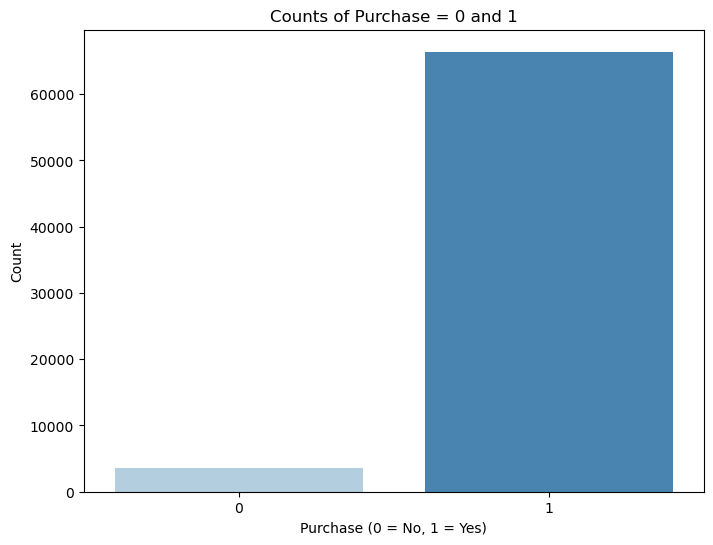

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of purchase counts
plt.figure(figsize=(8, 6))
sns.countplot(x='purchase', data=indian_df, palette='Blues')
plt.title('Counts of Purchase = 0 and 1')
plt.xlabel('Purchase (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


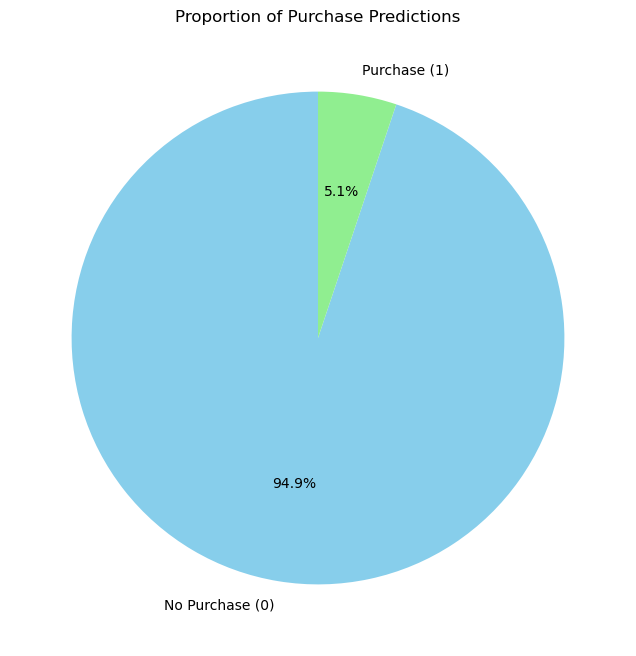

In [56]:
# Pie chart for purchase proportions
purchase_counts = indian_df['purchase'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(purchase_counts, labels=['No Purchase (0)', 'Purchase (1)'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Proportion of Purchase Predictions')
plt.show()


C:\Users\chakr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


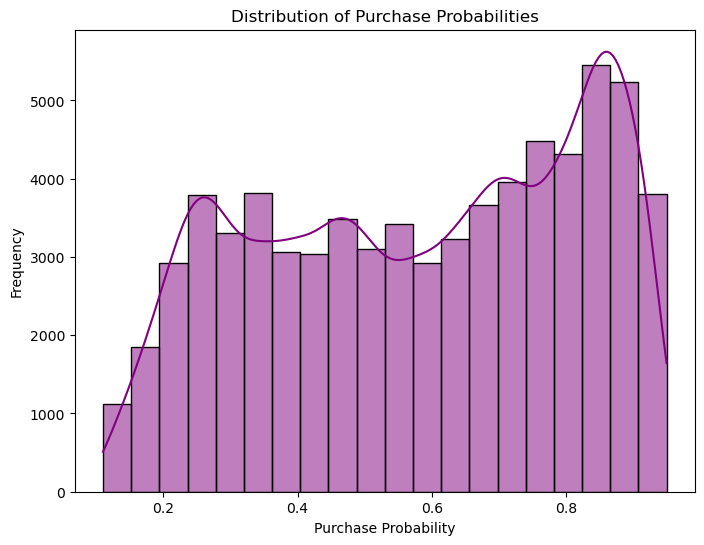

In [58]:
# Histogram of purchase probabilities
plt.figure(figsize=(8, 6))
sns.histplot(indian_df['purchase_probability'], bins=20, kde=True, color='purple')
plt.title('Distribution of Purchase Probabilities')
plt.xlabel('Purchase Probability')
plt.ylabel('Frequency')
plt.show()

# Replace infinite values in the dataset with NaN
indian_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# After replacing, you might also want to drop rows with NaN values or fill them:
# Drop rows with NaN values (optional)
indian_df.dropna(inplace=True)



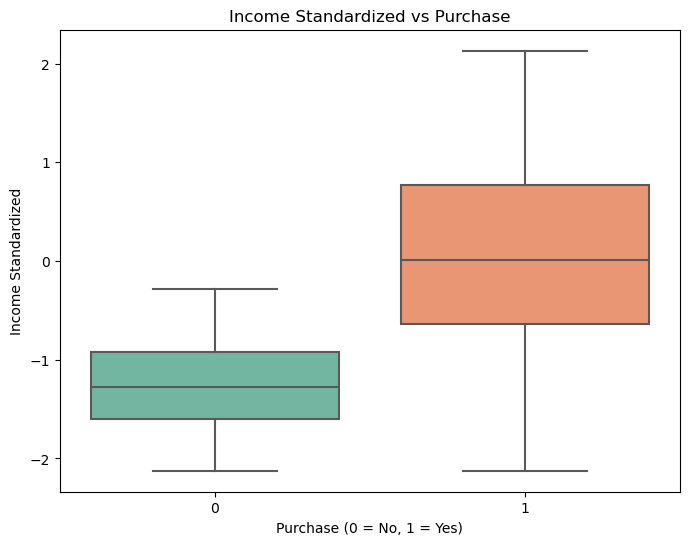

In [59]:
# Box plot of income_standardized vs purchase
plt.figure(figsize=(8, 6))
sns.boxplot(x='purchase', y='income_standardized', data=indian_df, palette='Set2')
plt.title('Income Standardized vs Purchase')
plt.xlabel('Purchase (0 = No, 1 = Yes)')
plt.ylabel('Income Standardized')
plt.show()


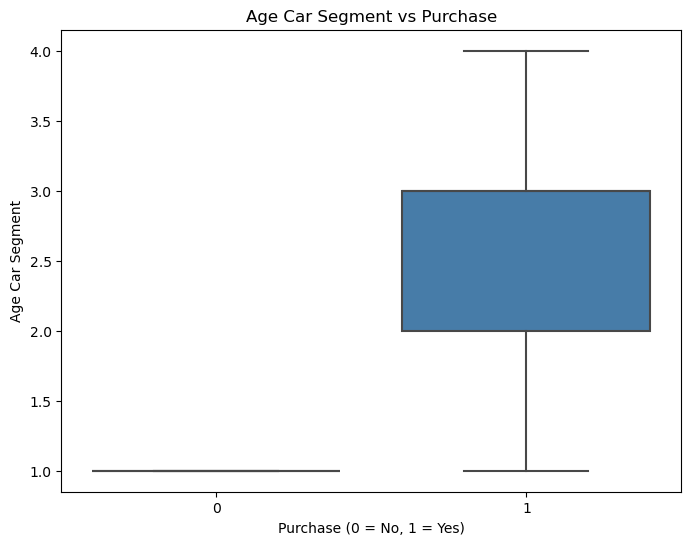

In [60]:
# Box plot of age_car_segment vs purchase
plt.figure(figsize=(8, 6))
sns.boxplot(x='purchase', y='age_car_segment', data=indian_df, palette='Set1')
plt.title('Age Car Segment vs Purchase')
plt.xlabel('Purchase (0 = No, 1 = Yes)')
plt.ylabel('Age Car Segment')
plt.show()
